<a href="https://colab.research.google.com/github/MushiG/Programaci-n/blob/main/5_Titanic_Clas_sup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://www.earth.ac.cr/wp-content/themes/cummins/images/logo-es.png)
## Curso de Programación aplicada a la agricultura
###Material de apoyo Tema Análisis de Datos
# Jupyter_7 Ejemplo de uso de Aprendizaje Supervisado

### Preparado por:
Prof. Gregory Guevara, 
Enero 2023, gguevara@earth.ac.cr


**Aprendizaje Automatico** 

Primeramente importamos las librerias básicas!

In [ ]:
import numpy as np
import pandas as pd

Seguidamente, exportamos los datos:

In [ ]:
url='https://raw.githubusercontent.com/greko-guevara/tareas_IA/main/titanic3.csv'

data=pd.read_csv(url)


Verificamos el tamaño de los datos, donde verificamos que se trate de 1310 instancias y 12 columnas de features: 

In [ ]:
data.shape

(1310, 14)

Visualizamos los primeros datos con .head() 

In [ ]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Elegimos nuestras columnas de interes:

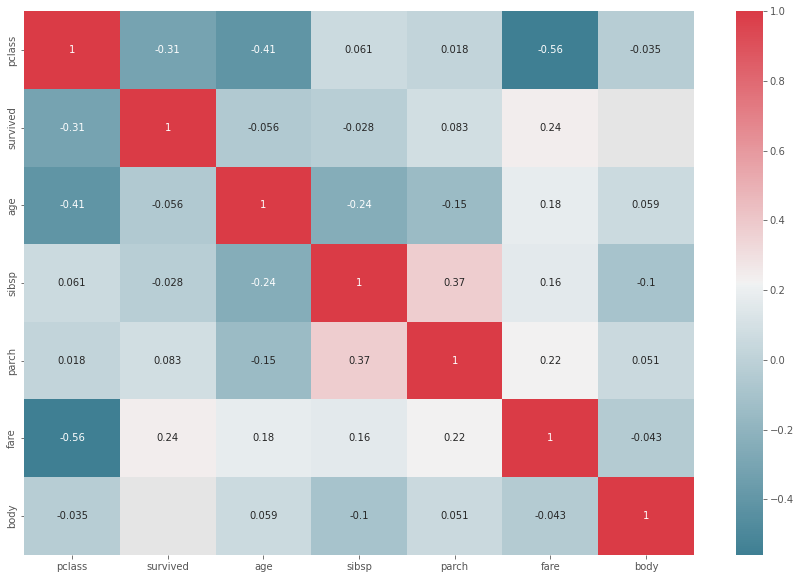

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def correlation_heatmap(data):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)

In [ ]:
cols_to_use = ['pclass','sex','age','sibsp','parch','fare','survived']
data = data[cols_to_use]

Verificamos la existencia de NaN:

In [ ]:
data.isnull().values.any()

True

Convertimos a "data" en un nuevo set pero esta vez sin "NaN":

In [ ]:
data = data.dropna()

Verificamos el tamano del nuevo set, ahora sin NaN:

In [ ]:
data.shape

(1045, 7)

## Modelo de Aprendizaje Simple

Reemplazamos el valor categórico de género por valores enteros, en este caso binarios:

Siempre en clasificación las variables categoricas se define como interger y no string

In [ ]:
data['sex']=data['sex'].replace({'male': 0, 'female' :1})

<ipython-input-135-fd3d41a73313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex']=data['sex'].replace({'male': 0, 'female' :1})


Escogemos un conjunto de features básicos y la etiqueta:

In [ ]:
features = data[['sex','age','fare']]


In [ ]:
labels = data['survived']

Validamos los cambios llevados a cabo:

In [ ]:
data.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,1.0,1,29.0000,0.0,0.0,211.3375,1.0
1,1.0,0,0.9167,1.0,2.0,151.5500,1.0
2,1.0,1,2.0000,1.0,2.0,151.5500,0.0
3,1.0,0,30.0000,1.0,2.0,151.5500,0.0
4,1.0,1,25.0000,1.0,2.0,151.5500,0.0


In [ ]:
features.head(10)

,sex,age,fare
0,1,29.0000,211.3375
1,0,0.9167,151.5500
2,1,2.0000,151.5500
3,0,30.0000,151.5500
4,1,25.0000,151.5500
5,0,48.0000,26.5500
6,1,63.0000,77.9583
7,0,39.0000,0.0000
8,1,53.0000,51.4792
9,0,71.0000,49.5042


In [ ]:
features.tail(10)

,sex,age,fare
1295,0,21.0,7.2500
1296,0,27.0,8.6625
1298,0,36.0,9.5000
1299,0,27.0,14.4542
1300,1,15.0,14.4542
1301,0,45.5,7.2250
1304,1,14.5,14.4542
1306,0,26.5,7.2250
1307,0,27.0,7.2250
1308,0,29.0,7.8750


Procedemos a partir el conjunto de datos en training y testing:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13) 

Verificamos los tamaños:

In [ ]:
X_train.shape

(783, 3)

In [ ]:
X_test.shape

(262, 3)

In [ ]:
y_train.shape

(783,)

In [ ]:
y_test.shape

(262,)

Ahora contruiremos nuestro primer clasificador, usaremos un Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Definimos el modelo con profundidad máxima de 3:

In [ ]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

Llevamos a cabo el entrenamiento:

In [ ]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

Importamos la métrica, en este caso "accuracy":

In [ ]:
from sklearn.metrics import accuracy_score

Llevamos a cabo la predicción con valores de "testing":

In [ ]:
y_predict = DecisionTreeModel.predict(X_test)

y ahora evaluamos nuestros resultados con los verdaderos, para ver que tan bueno fue nuestro modelo:

In [ ]:
dt1 = accuracy_score(y_test, y_predict)
print ("La decision tree con una profundidad de 3 =", dt1)

La decision tree con una profundidad de 3 = 0.7900763358778626


De la siguiente forma, visualizamos el DT:

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'])

0

Desplegamos la imagen del árbol con las siguiente instrucción:

    <img src='simple_tree.png' width = 1000px> 

<img src='simple_tree.png' width = 1000px>

## Un modelo más completo, ahora con más features...

In [ ]:
features = data[['pclass','sex','age','sibsp','parch','fare']]

In [ ]:
features.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,1,29.0000,0.0,0.0,211.3375
1,1.0,0,0.9167,1.0,2.0,151.5500
2,1.0,1,2.0000,1.0,2.0,151.5500
3,1.0,0,30.0000,1.0,2.0,151.5500
4,1.0,1,25.0000,1.0,2.0,151.5500


In [ ]:
labels = data['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13) 

In [ ]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_predict = DecisionTreeModel.predict(X_test)

In [ ]:
dt2 = accuracy_score(y_test, y_predict)
dt2

0.8091603053435115

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree2.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree2.dot', '-o', 'simple_tree2.png'])

0

<img src='simple_tree2.png' width = 1000px> 

## ...y si variamos la profundidad del modelo anterior? 

In [ ]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 5)
DecisionTreeModel.fit(X_train,y_train)
y_predict = DecisionTreeModel.predict(X_test)
dt3 = accuracy_score(y_test, y_predict)
dt3

0.7938931297709924

## Pareciera no ser una buena estrategia! Que tal otro algoritmo?

Probamos con RF:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)

In [ ]:
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=20,
                       n_estimators=500, random_state=10)

In [ ]:
y_predict = RandomForestModel.predict(X_test)

In [ ]:
rf = accuracy_score(y_test,y_predict)
rf

0.8129770992366412

In [ ]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])

0

<img src='complete_tree.png' width = 1000px>

In [ ]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [ ]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [ ]:
importances.head(9)

,importance
feature,
sex,0.422322
fare,0.210851
pclass,0.142404
age,0.140200
parch,0.044410
sibsp,0.039812


In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

<AxesSubplot:xlabel='feature'>

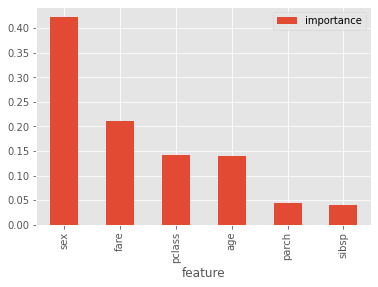

In [ ]:
importances.plot.bar()

Siempre es bueno, crear una tabla con los resultados y a partir de ella hacer los respectivos análisis y conclusiones:

Método | Features | Profundidad | Resultado
------------ | ------------- | ------------- | ------------- 
DT | 3 | 3 | 79.32%
DT | 5 | 3 | 80.44% 
DT | 5 | 5 | 79.88%
RF | 5 | NA | 81.00%
